In [27]:
import geemap   # Please update the geemap package for a better experience
import ee
import os
import geopandas as gpd
import pandas as pd
import fiona
from geemap import cartoee as cee
from geemap.datasets import DATA
from matplotlib import pylab
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gstools as gs
import matplotlib.pyplot as plt
import xarray as xr
%pylab inline
%matplotlib inline
# For very first time user Authentication is required
ee.Initialize()
#reducer = ee.Reducer.mean()


Populating the interactive namespace from numpy and matplotlib


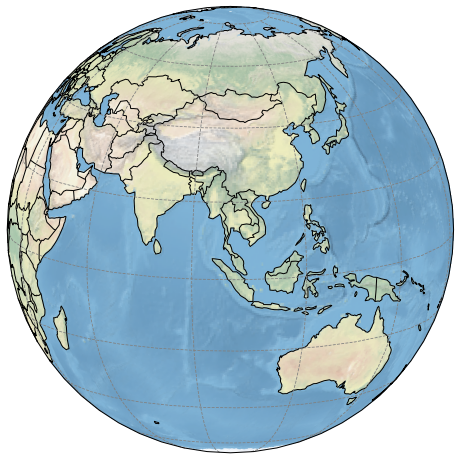

In [28]:
fig = plt.figure(figsize=(8, 12))

# set the projection to Orthographic
proj = ccrs.Orthographic(central_longitude=100, central_latitude=13)
ax = fig.add_subplot(1, 1, 1, projection = proj)
 
# set the extent to global
ax.set_global()
 
# set the gridlines
ax.gridlines(color='gray', linestyle = '--', xlocs = np.arange(0,360,30), ylocs = np.linspace(-80,80,9))
 
ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.RIVERS)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.OCEAN,color='darkgray')
ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.RIVERS)
ax.stock_img()
 
plt.show()

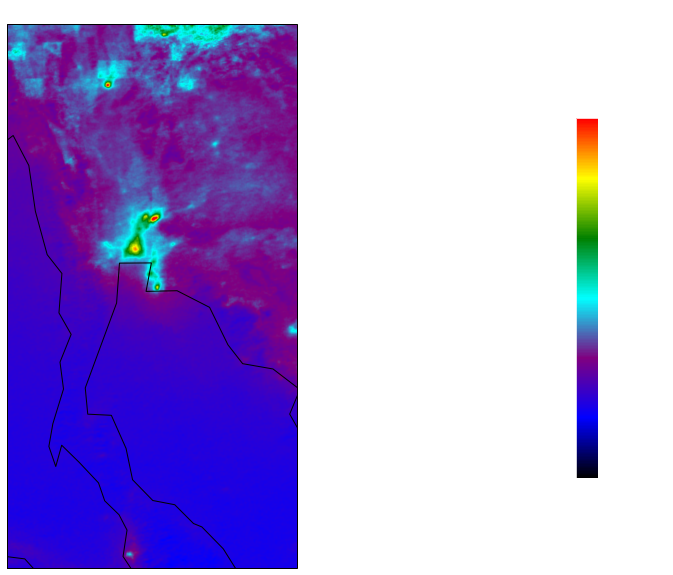

In [29]:
# get an earth engine image of ocean data for Jan-Mar 2018
#ocean = (
    #ee.ImageCollection('NASA/OCEANDATA/MODIS-Terra/L3SMI')
    #.filter(ee.Filter.date('2018-01-01', '2018-03-01'))
    #.median()
    #.select(["sst"], ["SST"])
#)

No = (ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')
      .filter(ee.Filter.date('2021-02-01', '2021-5-16'))
      .mean()
      .select(["NO2_column_number_density"],["NO2"])      
)

# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':"NO2", 'min':0, 'max':0.0002}

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",\
        ["black", "blue", "purple", "cyan", "green", "yellow", "red"])
# specify region to focus on

#bbox = [-180, -88, 180, 88]
bbox = [97, 5, 105,  20] 

fig = plt.figure(figsize=(15,10))

# plot the result with cartoee using a PlateCarre projection (default)
ax= cee.get_map(No, cmap=cmap, vis_params=visualization, region=bbox)
cb = cee.add_colorbar(ax, vis_params=visualization, loc='right', cmap=cmap)

ax.set_title(label = 'Sea Surface Temperature', fontsize = 15)
ax.coastlines()
plt.show()

In [30]:
fig = plt.figure(figsize=(15,10))
plt.style.use('dark_background') #Black color background

land = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')


No = (ee.ImageCollection('COPERNICUS/S5P/NRTI/L3_NO2')
      .filter(ee.Filter.date('2021-02-01', '2021-5-16'))
      .mean()
      .select(["NO2_column_number_density"],["NO2"])
      .clip(land)
)

# set parameters for plotting
# will plot the Sea Surface Temp with specific range and colormap
visualization = {'bands':"NO2", 'min':0, 'max':0.0002}

cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",\
        ["black", "blue", "purple", "cyan", "green", "yellow", "red"])
# specify region to focus on

bbox = [-180, -88, 180, 88]
#bbox = [97, 5, 105,  20] 


# create a new orographic projection focused on the Pacific
projection = ccrs.Orthographic(100,13)


<Figure size 1080x720 with 0 Axes>

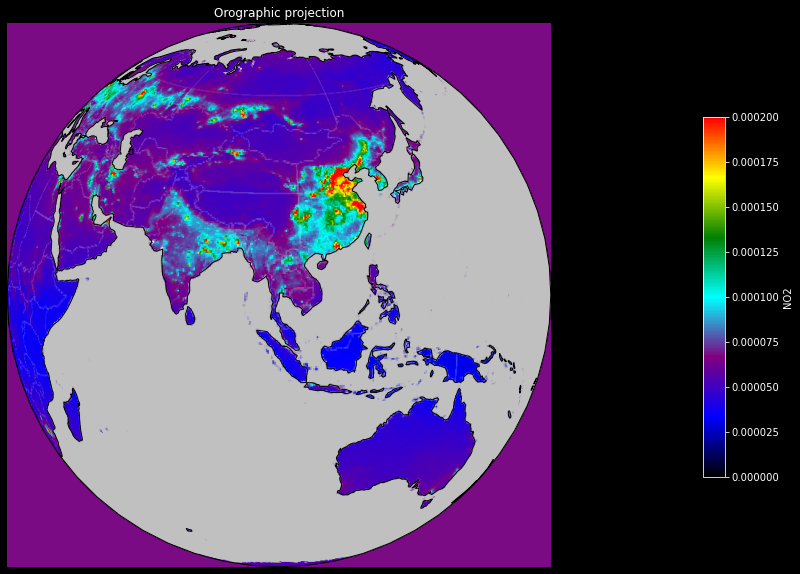

In [26]:
# plot the result with cartoee using the orographic projection
fig = plt.figure(figsize=(15,10))
ax = cee.get_map(No, vis_params=visualization, region=bbox,cmap=cmap, proj=projection)#,facecolor='none'
cb = cee.add_colorbar(ax, vis_params=visualization, loc='right', cmap=cmap,orientation='vertical')

ax.set_title("Orographic projection")

ax.coastlines()
ax.add_feature(cfeature.OCEAN,color='silver')
plt.show()